In [1]:
import numpy as np
import pandas as pd

In [2]:
combined_df = pd.read_csv("MonthBasedTest.csv", index_col=[0])

In [3]:
combined_df = combined_df[combined_df["Company"] != "SABHAN"]

In [4]:
combined_df

,Company,ROIC,pdate,Mean_F9,Mean_Pct_Change_F6
0,PAKS,1.053594,1398-01,9.842520e+12,23.101715
1,PAKS,1.053594,1398-02,1.011360e+13,-1.726512
2,PAKS,1.053594,1398-03,1.033890e+13,0.871175
3,PAKS,1.053594,1398-04,1.026120e+13,3.765920
4,PAKS,1.053594,1398-05,1.130760e+13,16.275597
...,...,...,...,...,...
5095,KRAZI,0.105642,1402-08,4.617770e+13,2.242152
5096,KRAZI,0.105642,1402-09,4.895060e+13,6.532663
5097,KRAZI,0.105642,1402-10,4.752860e+13,-5.995204
5098,KRAZI,0.105642,1402-11,4.648740e+13,-6.579805


In [5]:
def calculate_advanced_portfolio_weights(df, feature_col, exponent=2):
    # Step 1: Find the minimum value in the feature column and shift values if necessary
    min_value = df[feature_col].min()
    shift_constant = abs(min_value) if min_value < 0 else 0
    df['shifted_feature'] = df[feature_col] + shift_constant
    
    # Step 2: Apply exponential weighting
    df['exp_weight'] = np.power(df['shifted_feature'], exponent)
    
    # Step 3: Normalize the weights
    df['weight'] = df['exp_weight'] / df['exp_weight'].sum()
    
    # Drop the intermediate columns used in calculations
    df.drop(columns=['shifted_feature', 'exp_weight'], inplace=True)
    
    # Step 4: Calculate Mean_F9 proportion and create a new column
    df['Mean_F9_Proportion'] = df['Mean_F9'] / df['Mean_F9'].sum()
    
    # Step 5: Create a new column which is Pct_Change_F6 multiplied by the Mean_F9 proportion
    df['Pct_Change_F6_Mean_F9'] = df['Mean_Pct_Change_F6'] * df['Mean_F9_Proportion']
    
    # Step 6: Create a new column which is Pct_Change_F6 multiplied by the weight
    df['Pct_Change_F6_Weight'] = df['Mean_Pct_Change_F6'] * df['weight']
    
    # Step 7: Calculate the sums of the new columns
    sum_pct_change_mean_f9 = df['Pct_Change_F6_Mean_F9'].sum()
    sum_pct_change_weight = df['Pct_Change_F6_Weight'].sum()
    
    return df, sum_pct_change_mean_f9, sum_pct_change_weight


# Define the range of years and months
years = range(1398, 1403)  # From 1397 to 1402
months = [f"{m:02d}" for m in range(1, 13)]  # From '01' to '12'

# Create a new DataFrame to store cumulative results
cumulative_results = []

# Loop through each year and each month within the year
for year in years:
    for month in months:
        # Create the year-month string
        year_month = f"{year}-{month}"
        
        # Filter the combined_df for the specific year-month
        filtered_df = combined_df[combined_df['pdate'] == year_month]
        
        if filtered_df.empty:
            continue  # Skip if no data for that specific year-month

        # Calculate portfolio weights and perform the additional calculations
        _, sum_pct_change_mean_f9, sum_pct_change_weight = calculate_advanced_portfolio_weights(filtered_df, 'ROIC', exponent=3)
        
        # Store the cumulative results in a list
        cumulative_results.append({
            'year_month': year_month,
            'sum_pct_change_mean_f9': sum_pct_change_mean_f9,
            'sum_pct_change_weight': sum_pct_change_weight
        })

# Convert the results into a DataFrame for easier plotting
cumulative_df = pd.DataFrame(cumulative_results)


cumulative_df.head()


C:\Users\arash\AppData\Local\Temp\ipykernel_1620\3184372825.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['shifted_feature'] = df[feature_col] + shift_constant
C:\Users\arash\AppData\Local\Temp\ipykernel_1620\3184372825.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['exp_weight'] = np.power(df['shifted_feature'], exponent)
C:\Users\arash\AppData\Local\Temp\ipykernel_1620\3184372825.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

C:\Users\arash\AppData\Local\Temp\ipykernel_1620\3184372825.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mean_F9_Proportion'] = df['Mean_F9'] / df['Mean_F9'].sum()
C:\Users\arash\AppData\Local\Temp\ipykernel_1620\3184372825.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pct_Change_F6_Mean_F9'] = df['Mean_Pct_Change_F6'] * df['Mean_F9_Proportion']
C:\Users\arash\AppData\Local\Temp\ipykernel_1620\3184372825.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

C:\Users\arash\AppData\Local\Temp\ipykernel_1620\3184372825.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mean_F9_Proportion'] = df['Mean_F9'] / df['Mean_F9'].sum()
C:\Users\arash\AppData\Local\Temp\ipykernel_1620\3184372825.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pct_Change_F6_Mean_F9'] = df['Mean_Pct_Change_F6'] * df['Mean_F9_Proportion']
C:\Users\arash\AppData\Local\Temp\ipykernel_1620\3184372825.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

,year_month,sum_pct_change_mean_f9,sum_pct_change_weight
0,1398-01,10.756743,20.449711
1,1398-02,5.709840,19.794748
2,1398-03,4.046080,12.474096
3,1398-04,3.263463,4.684121
4,1398-05,-2.162800,14.401974


In [6]:
predicted_1403 = pd.read_csv("cumulative_df_1403_test_final.csv", index_col=[0])
predicted_1403 = predicted_1403[['year_month','sum_pct_change_mean_f9', 'sum_pct_change_weight']]

In [7]:
predicted_1403.head()

,year_month,sum_pct_change_mean_f9,sum_pct_change_weight
0,1403-01,-1.054832,-3.003251
1,1403-02,-8.735924,-7.899230
2,1403-03,-5.333193,-5.870000
3,1403-04,2.634509,3.807363
4,1403-05,-8.833099,-6.733953


In [8]:
cumulative_df.head()

,year_month,sum_pct_change_mean_f9,sum_pct_change_weight
0,1398-01,10.756743,20.449711
1,1398-02,5.709840,19.794748
2,1398-03,4.046080,12.474096
3,1398-04,3.263463,4.684121
4,1398-05,-2.162800,14.401974


In [9]:
predicted_1403.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year_month              6 non-null      object 
 1   sum_pct_change_mean_f9  6 non-null      float64
 2   sum_pct_change_weight   6 non-null      float64
dtypes: float64(2), object(1)
memory usage: 192.0+ bytes


In [10]:
# Concatenate DataFrames
concated_df = pd.concat([cumulative_df, predicted_1403], ignore_index=True)

In [11]:
concated_df.head()

,year_month,sum_pct_change_mean_f9,sum_pct_change_weight
0,1398-01,10.756743,20.449711
1,1398-02,5.709840,19.794748
2,1398-03,4.046080,12.474096
3,1398-04,3.263463,4.684121
4,1398-05,-2.162800,14.401974


In [12]:
concated_df.tail(10)

,year_month,sum_pct_change_mean_f9,sum_pct_change_weight
56,1402-09,9.029043,4.319169
57,1402-10,-3.251121,-2.371545
58,1402-11,-5.765002,-5.194159
59,1402-12,-5.755303,-2.845859
60,1403-01,-1.054832,-3.003251
61,1403-02,-8.735924,-7.899230
62,1403-03,-5.333193,-5.870000
63,1403-04,2.634509,3.807363
64,1403-05,-8.833099,-6.733953
65,1403-06,-0.325911,5.029452


In [13]:
# Convert percentage changes to decimal form
concated_df['sum_pct_change_mean_f9'] /= 100
concated_df['sum_pct_change_weight'] /= 100

In [14]:
concated_df.head()

,year_month,sum_pct_change_mean_f9,sum_pct_change_weight
0,1398-01,0.107567,0.204497
1,1398-02,0.057098,0.197947
2,1398-03,0.040461,0.124741
3,1398-04,0.032635,0.046841
4,1398-05,-0.021628,0.144020


In [15]:
initial_investment = 1

# Calculate cumulative investment values
concated_df['investment_A'] = initial_investment * (1 + concated_df['sum_pct_change_mean_f9']).cumprod()
concated_df['investment_B'] = initial_investment * (1 + concated_df['sum_pct_change_weight']).cumprod()

# Display the resulting DataFrame with trend value
concated_df.head()

,year_month,sum_pct_change_mean_f9,sum_pct_change_weight,investment_A,investment_B
0,1398-01,0.107567,0.204497,1.107567,1.204497
1,1398-02,0.057098,0.197947,1.170808,1.442924
2,1398-03,0.040461,0.124741,1.218180,1.622916
3,1398-04,0.032635,0.046841,1.257934,1.698935
4,1398-05,-0.021628,0.144020,1.230728,1.943616


In [16]:
concated_df.tail(10)

,year_month,sum_pct_change_mean_f9,sum_pct_change_weight,investment_A,investment_B
56,1402-09,0.090290,0.043192,3.175251,12.154270
57,1402-10,-0.032511,-0.023715,3.072020,11.866026
58,1402-11,-0.057650,-0.051942,2.894918,11.249686
59,1402-12,-0.057553,-0.028459,2.728306,10.929536
60,1403-01,-0.010548,-0.030033,2.699527,10.601294
61,1403-02,-0.087359,-0.078992,2.463699,9.763874
62,1403-03,-0.053332,-0.058700,2.332305,9.190734
63,1403-04,0.026345,0.038074,2.393750,9.540659
64,1403-05,-0.088331,-0.067340,2.182307,8.898195
65,1403-06,-0.003259,0.050295,2.175195,9.345726


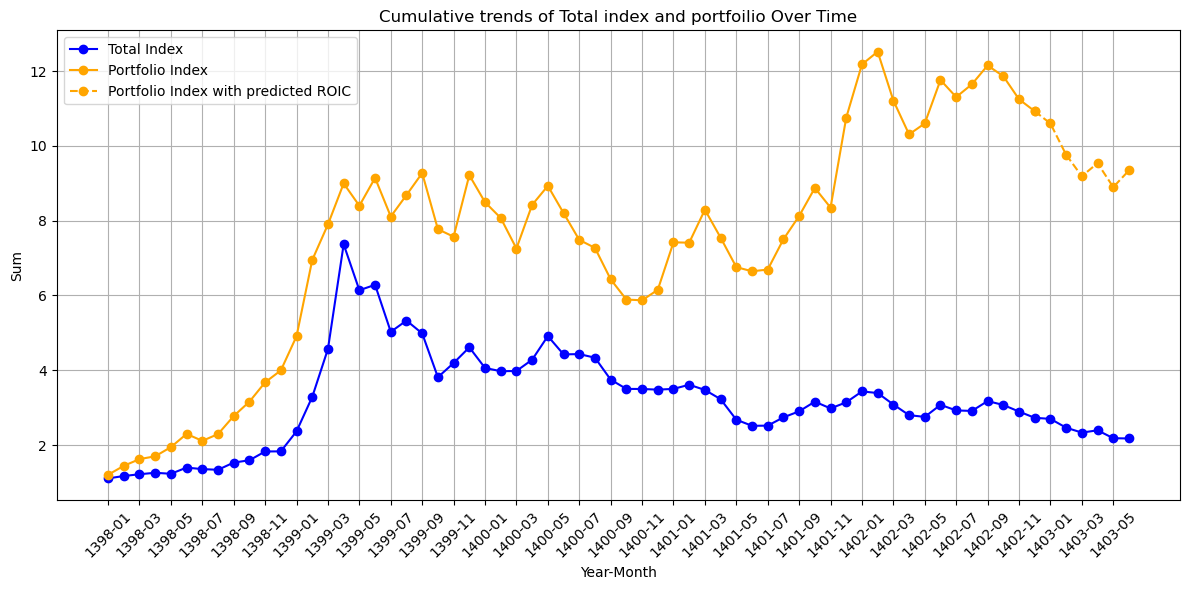

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Filter data for periods
data_after_1403 = concated_df[concated_df['year_month'] >= '1402-12']
data_before_1403 = concated_df[concated_df['year_month'] <= '1402-12']

# Plot data for each period
plt.plot(concated_df['year_month'], concated_df['investment_A'], label='Total Index', marker='o', color='blue')
plt.plot(data_before_1403['year_month'], data_before_1403['investment_B'], label='Portfolio Index', marker='o', color='orange')
plt.plot(data_after_1403['year_month'], data_after_1403['investment_B'], label='Portfolio Index with predicted ROIC', linestyle='--', marker='o', color='orange')

# Set x-ticks for better spacing
plt.xticks(ticks=range(0, len(concated_df),2), labels=concated_df['year_month'][::2], rotation=45)

plt.xlabel('Year-Month')
plt.ylabel('Sum')
plt.title('Cumulative trends of Total index and portfoilio Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


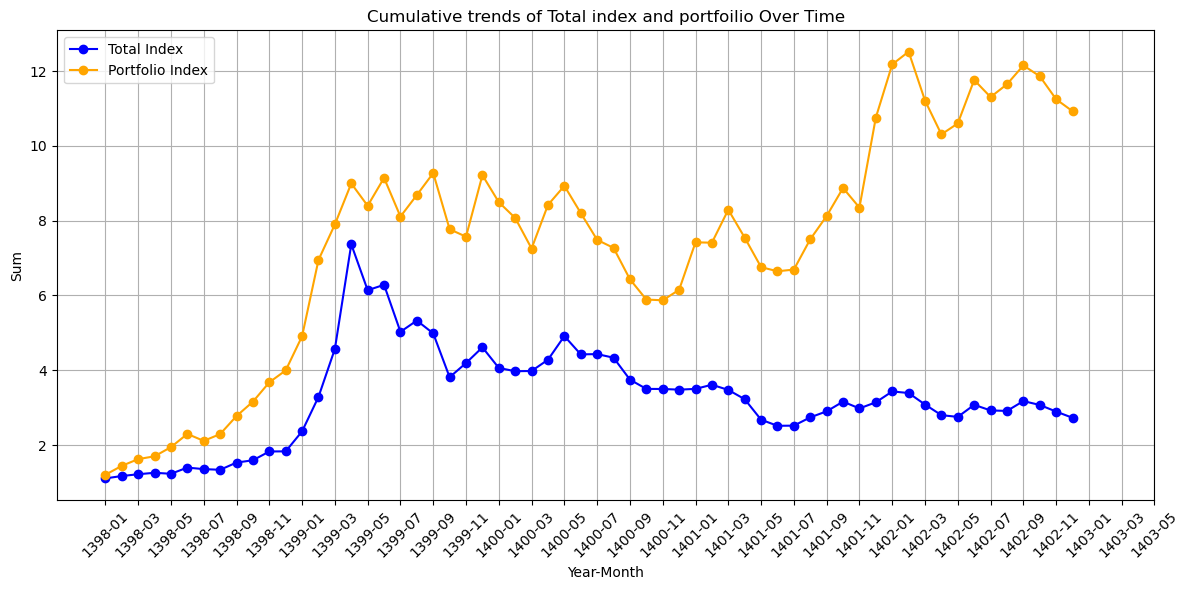

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Filter data for periods
data_after_1403 = concated_df[concated_df['year_month'] >= '1402-12']
data_before_1403 = concated_df[concated_df['year_month'] <= '1402-12']

# Plot data for each period
plt.plot(data_before_1403['year_month'], data_before_1403['investment_A'], label='Total Index', marker='o', color='blue')
plt.plot(data_before_1403['year_month'], data_before_1403['investment_B'], label='Portfolio Index', marker='o', color='orange')
# plt.plot(data_after_1403['year_month'], data_after_1403['investment_B'], label='Portfolio Index with predicted ROIC', linestyle='--', marker='o', color='orange')

# Set x-ticks for better spacing
plt.xticks(ticks=range(0, len(concated_df),2), labels=concated_df['year_month'][::2], rotation=45)

plt.xlabel('Year-Month')
plt.ylabel('Sum')
plt.title('Cumulative trends of Total index and portfoilio Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


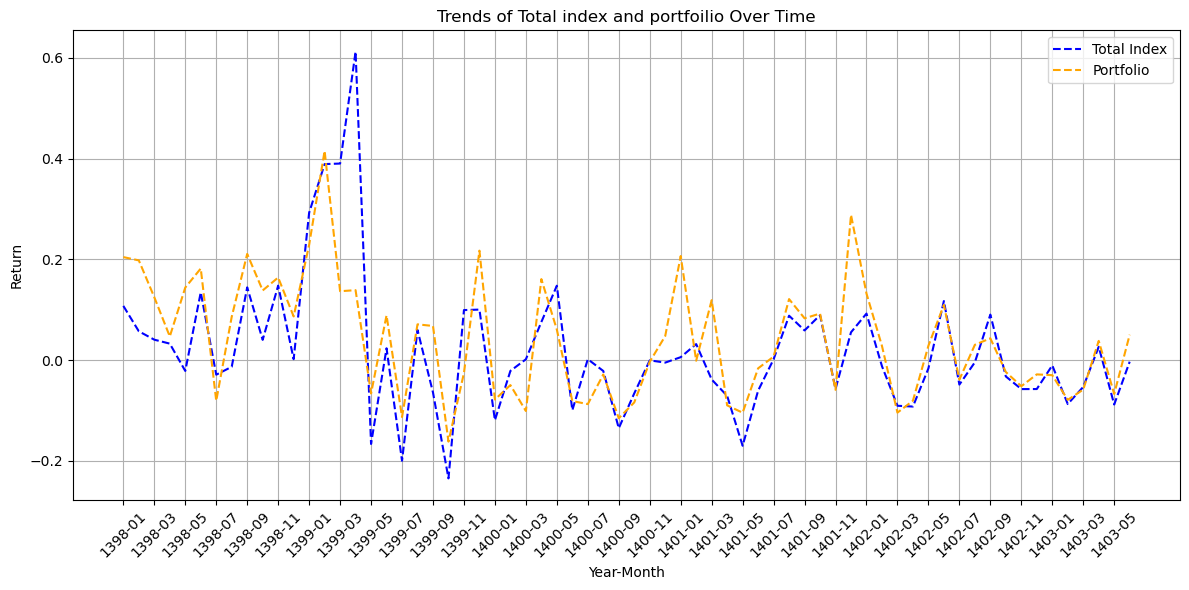

In [23]:
# Plot the investment trends
plt.figure(figsize=(12, 6))
plt.plot(concated_df['year_month'], concated_df['sum_pct_change_mean_f9'], label='Total Index', linestyle='--', color='blue')
plt.plot(concated_df['year_month'], concated_df['sum_pct_change_weight'], label='Portfolio', linestyle='--', color='orange')


# Set x-ticks for better spacing
plt.xticks(ticks=range(0, len(concated_df), 2), labels=concated_df['year_month'][::2], rotation=45)

plt.xlabel('Year-Month')
plt.ylabel('Return')
plt.title('Trends of Total index and portfoilio Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


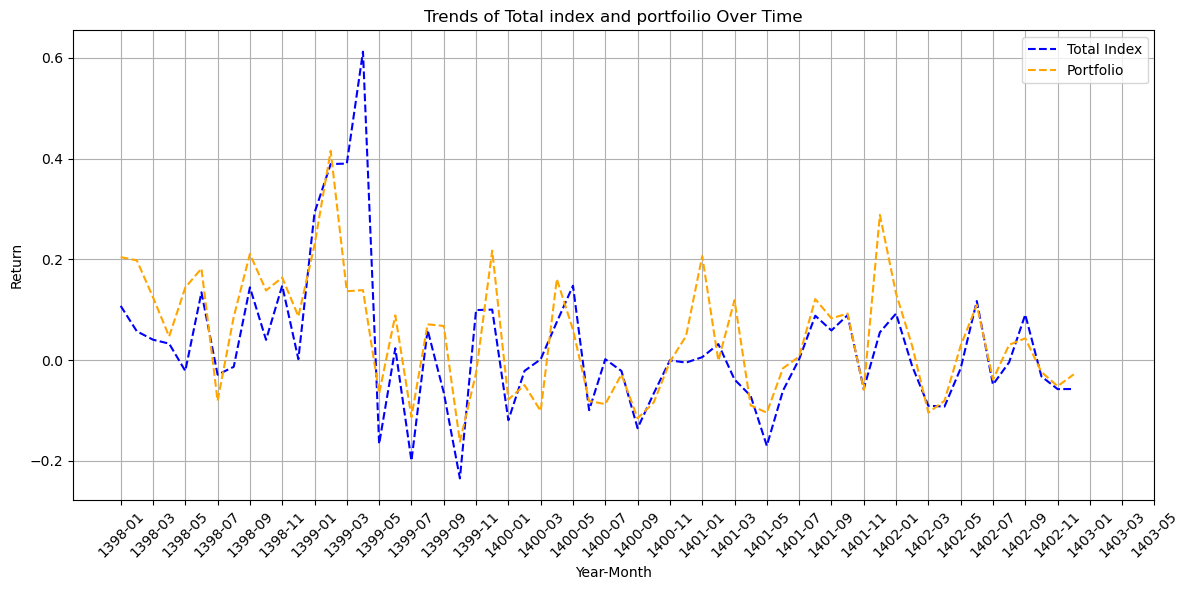

In [22]:
# Plot the investment trends
plt.figure(figsize=(12, 6))
plt.plot(data_before_1403['year_month'], data_before_1403['sum_pct_change_mean_f9'], label='Total Index', linestyle='--', color='blue')
plt.plot(data_before_1403['year_month'], data_before_1403['sum_pct_change_weight'], label='Portfolio', linestyle='--', color='orange')


# Set x-ticks for better spacing
plt.xticks(ticks=range(0, len(concated_df), 2), labels=concated_df['year_month'][::2], rotation=45)

plt.xlabel('Year-Month')
plt.ylabel('Return')
plt.title('Trends of Total index and portfoilio Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
